In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [ ]:
#Split data
def train_and_test(X, y, test_size=0.1):

    a = int((1 - test_size) * X.shape[0]) 
    b = np.random.permutation(X.shape[0])
    
    X_train, X_test = np.split(np.take(X,b,axis=0), [a])
    y_train, y_test = np.split(np.take(y,b), [a])
    return X_train, X_test, y_train, y_test

def R2(Y, Y_hat):
    return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [ ]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X=X
        self.y=y
    
    def predict(self, X, K, epsilon=1e-3):
        N=len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K] ##gives indexes of sorted df
            gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))  ##weights 
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()  ### what happen if subtract epsilon?
            
        return y_hat

def accuracy(y,y_hat):
  return np.mean(y == y_hat)

In [ ]:
data = pd.read_csv("/content/Cirrhosis.csv")

In [ ]:
#cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
#cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF"])

In [ ]:
data

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,309,994,0,2,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,310,939,0,1,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,311,839,0,1,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [ ]:
#data=data.fillna(0)

In [ ]:
data.status.unique()

array([2, 0, 1])

In [ ]:
data.isnull().sum()


index             0
duration          0
status            0
drug              0
age               0
sex               0
ascites           0
hepatomology      0
spiders           0
edema             0
bilirubin         0
cholesterol      28
albumin           0
copper            2
phosphatase       0
SGOT              0
triglicerides    30
platelets         4
prothrombin       0
stage             0
dtype: int64

In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          312 non-null    int64  
 1   duration       312 non-null    int64  
 2   status         312 non-null    int64  
 3   drug           312 non-null    int64  
 4   age            312 non-null    int64  
 5   sex            312 non-null    int64  
 6   ascites        312 non-null    int64  
 7   hepatomology   312 non-null    int64  
 8   spiders        312 non-null    int64  
 9   edema          312 non-null    float64
 10  bilirubin      312 non-null    float64
 11  cholesterol    284 non-null    float64
 12  albumin        312 non-null    float64
 13  copper         310 non-null    float64
 14  phosphatase    312 non-null    float64
 15  SGOT           312 non-null    float64
 16  triglicerides  282 non-null    float64
 17  platelets      308 non-null    float64
 18  prothrombi

In [ ]:
corelation = data.corr()

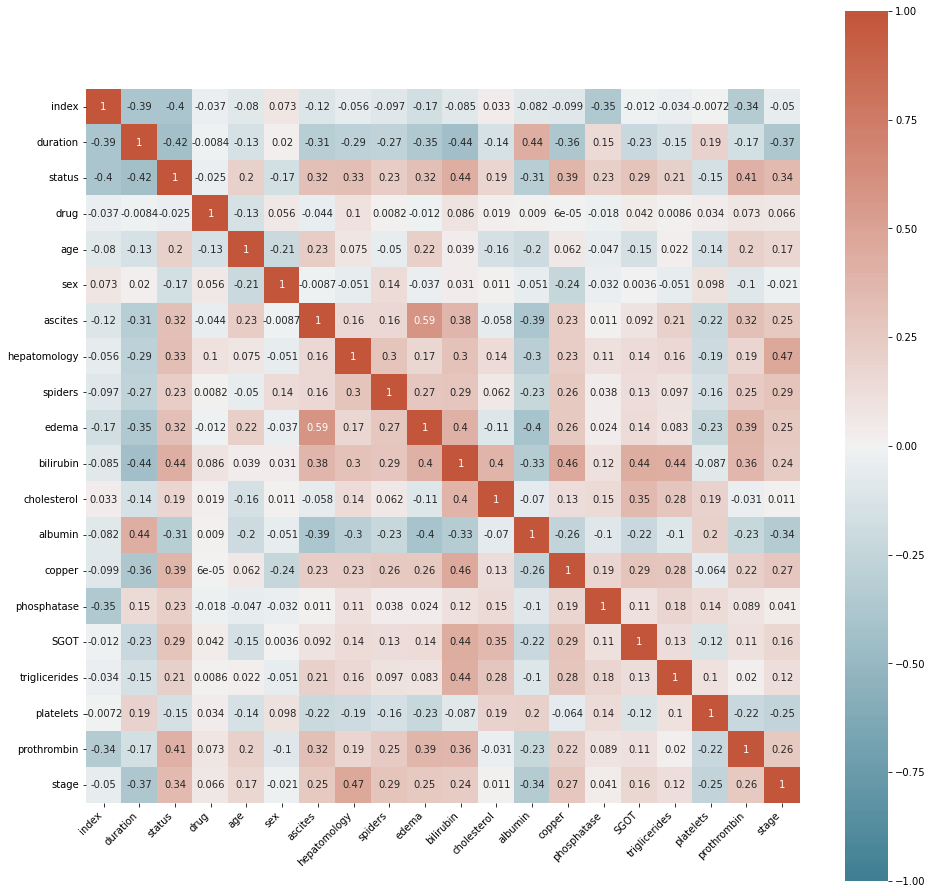

In [ ]:
### Create hitmap using seaborn library to visualize correlations.
import seaborn as sns
plt.figure(figsize=(16, 16))
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220,20, n=220), square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
#sns.pairplot(data)

In [ ]:
data.columns

Index(['index', 'duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 'cholesterol',
       'albumin', 'copper', 'phosphatase', 'SGOT', 'triglicerides',
       'platelets', 'prothrombin', 'stage'],
      dtype='object')

In [ ]:
data.status.unique()

array([2, 0, 1])

In [ ]:
X = data[["phosphatase", "bilirubin", "albumin"]]
y = data["status"]

In [ ]:
X = X.to_numpy()
y = y.to_numpy()
X= X/X.max()
##Normalise 

In [ ]:
X_test,X_train,y_test,y_train = train_and_test(X, y)  #Split dataa

In [ ]:
X_test.shape

(280, 3)

In [ ]:
X_train.shape

(32, 3)

In [ ]:
knn = KNNClassifier()
knn.fit(X_train,y_train)
y_hat_knn = knn.predict(X_train, 3, epsilon=1e-3)

accuracy(y_train, y_hat_knn)

0.84375

In [ ]:
y_hat_knn_test = knn.predict(X_test, 3, epsilon=1e-1)

In [ ]:
accuracy(y_test, y_hat_knn_test)

0.5178571428571429

In [ ]:
class KNNRegressor():
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def predict(self,X,K, epsilon=2e-3):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum() + epsilon)
            y_hat[i] = gamma_k.dot(self.y[idxt])
            
        return y_hat

In [ ]:
X = data[["phosphatase", "bilirubin", "albumin", "status" ]]
y = data['stage']

X = X.to_numpy()
y = y.to_numpy()
X= X/X.max()

X_test,X_train,y_test,y_train = train_and_test(X, y)  #Split dataa

In [ ]:
data.stage.unique()

array([4, 3, 2, 1])

In [ ]:
Rknn = KNNRegressor()
Rknn.fit(X_train,y_train)
y_hat_Rknn = Rknn.predict(X_train, 1, epsilon=2e-8)
R2(y_train, y_hat_Rknn)

0.9999999999999931

In [ ]:
Rknn = KNNRegressor()
Rknn.fit(X_test,y_test)
y_hat_Rknn_test = Rknn.predict(X_test, 1, epsilon=2e-8)
R2(y_test,y_hat_Rknn_test)

0.9999999999999949